### Load Libraries

In [1]:
import os
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from ggplot import *
import seaborn as sns

C:\Users\Prajwal\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Prajwal\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\Prajwal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Read given train data

In [2]:
print(os.getcwd())
data = pd.read_csv("Train.csv", header=0)

print("Shape of data is: {}".format(data.shape))
print (" ")
print("List of columns is: ", list(data.columns))
print (" ")

C:\Users\Prajwal\Desktop\Prajwal_DS_Course\Practice\PhD
Shape of data is: (7861, 12)
 
List of columns is:  ['FlightNumber', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime', 'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination', 'Distance', 'ActualArrivalTimeStamp']
 


In [3]:
from datetime import datetime

data["scheduledTime"] = data.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x['Year'],x['Month'], x['DayofMonth'],x['ScheduledArrTime']), "%Y %m %d %H%M"),axis=1)
data["ActualTime"] = data["ActualArrivalTimeStamp"].apply(lambda x: datetime.strptime(x,"%d/%m/%y %H:%M"))

import time
import datetime

def comp_dates(d1, d2):
    return (time.mktime(time.strptime(d2,"%Y-%m-%d %H:%M:%S"))-\
           time.mktime(time.strptime(d1, "%Y-%m-%d %H:%M:%S")))/60

data['Time1'] = data['scheduledTime'].astype('str')
data['Time2'] = data['ActualTime'].astype('str')

data["difference"] = data.apply(lambda row: comp_dates(row['Time1'], row['Time2']), axis=1)

data['FlightDelayStatus'] = np.where(data['difference'] > 15.0, "Yes", "No")

data = data.drop(['ActualArrivalTimeStamp', 'Time1','Time2'], axis=1)

### Data Visualization from given train data

In [5]:
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

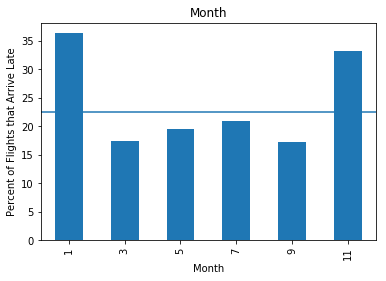

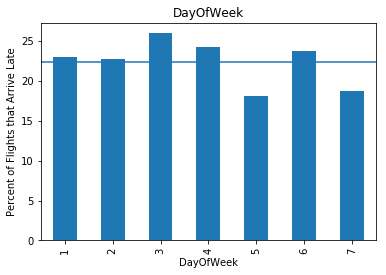

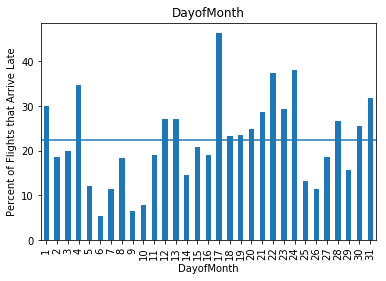

In [6]:
avgLate = np.sum(data['difference'])/len(data['difference'])

attributes = ['Month','DayOfWeek', 'DayofMonth']

for i,pred in enumerate(attributes):
    plt.figure(i, figsize=(15, 5))
    group = data.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'difference']] #FlightDelayStatus
    group.sort_values(by=pred, inplace=True)    
    group.plot.bar(x=pred, y='difference')
    plt.axhline(y=avgLate, label='Average')
    plt.ylabel('Percent of Flights that Arrive Late')
    plt.title(pred)
    plt.legend().remove()

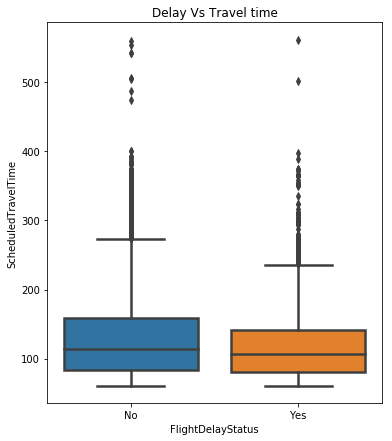

In [8]:
plt.figure(figsize = (6,7))
sns.boxplot(data.FlightDelayStatus,data.ScheduledTravelTime,linewidth=2.5).set_title('Delay Vs Travel time')
plt.show()

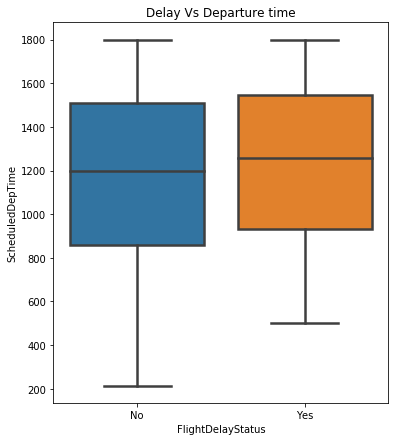

In [9]:
plt.figure(figsize = (6,7))
sns.boxplot(data.FlightDelayStatus,data.ScheduledDepTime,linewidth=2.5).set_title('Delay Vs Departure time')
plt.show()

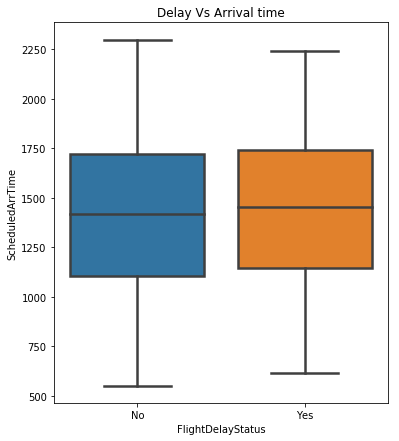

In [10]:
plt.figure(figsize = (6,7))
sns.boxplot(data.FlightDelayStatus,data.ScheduledArrTime,linewidth=2.5).set_title('Delay Vs Arrival time')
plt.show()

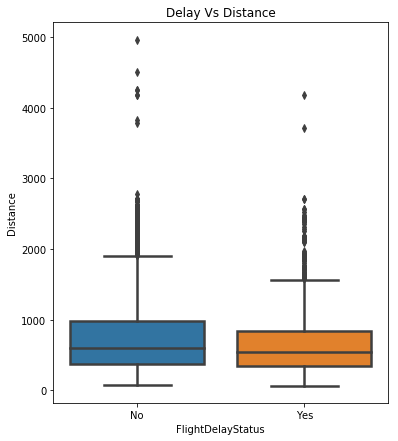

In [11]:
plt.figure(figsize = (6,7))
sns.boxplot(data.FlightDelayStatus,data.Distance,linewidth=2.5).set_title('Delay Vs Distance')
plt.show()

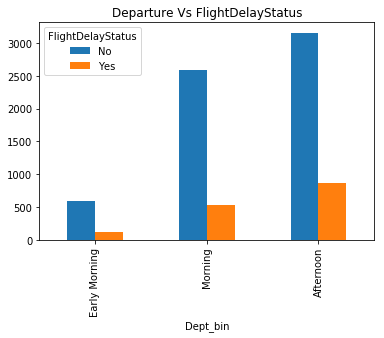

In [40]:
Dept_delay= data.groupby(['Dept_bin','FlightDelayStatus']).size().unstack().reset_index().set_index('Dept_bin')
plt.figure(figsize=(8,5))
Dept_delay.plot(kind= 'bar',title = 'Departure Vs FlightDelayStatus')
plt.show()

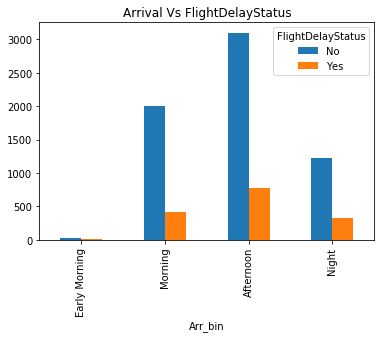

In [45]:
Dept_delay= data.groupby(['Arr_bin','FlightDelayStatus']).size().unstack().reset_index().set_index('Arr_bin')
plt.figure(figsize=(15,10))
Dept_delay.plot(kind= 'bar',title = 'Arrival Vs FlightDelayStatus')
plt.show()

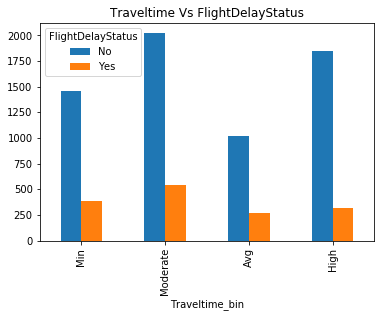

In [46]:
Dept_delay= data.groupby(['Traveltime_bin','FlightDelayStatus']).size().unstack().reset_index().set_index('Traveltime_bin')
plt.figure(figsize=(15,10))
Dept_delay.plot(kind= 'bar',title = 'Traveltime Vs FlightDelayStatus')
plt.show()

In [1]:
#Dept_delay= data.groupby(['Origin','FlightDelayStatus']).size().unstack().reset_index().set_index('Origin')
#plt.figure(figsize=(15,10))
#Dept_delay.plot(kind= 'bar',title = 'Origin Vs FlightDelayStatus')
#plt.show()

In [54]:
print(data.groupby(['FlightDelayStatus','Origin']).size().unstack())
print("")

Origin             ABE  ABI   ABQ  ABY  ACV  ACY  AEX  AGS   ALB  AMA  ...   \
FlightDelayStatus                                                      ...    
No                 3.0  5.0  40.0  1.0  3.0  1.0  5.0  4.0  15.0  9.0  ...    
Yes                1.0  2.0   2.0  3.0  1.0  2.0  NaN  NaN   2.0  NaN  ...    

Origin              TPA  TRI   TUL   TUS  TVC  TXK  TYR   TYS  VLD   XNA  
FlightDelayStatus                                                         
No                 84.0  4.0  22.0  25.0  2.0  1.0  2.0  16.0  2.0  21.0  
Yes                11.0  1.0   3.0   1.0  NaN  NaN  1.0   2.0  1.0   3.0  

[2 rows x 223 columns]



In [55]:
print(data.groupby(['FlightDelayStatus','Destination']).size().unstack())
print("")

Destination        ABE  ABI   ABQ  ABY  ACT  ACV  ACY  AEX  AGS  AKN  ...   \
FlightDelayStatus                                                     ...    
No                 2.0  1.0  44.0  1.0  1.0  6.0  1.0  2.0  1.0  2.0  ...    
Yes                3.0  1.0   6.0  NaN  NaN  NaN  NaN  4.0  1.0  NaN  ...    

Destination        TLH  TOL   TPA  TRI   TUL   TUS  TVC  TYS  VLD   XNA  
FlightDelayStatus                                                        
No                 4.0  NaN  66.0  1.0  18.0  10.0  1.0  8.0  4.0  13.0  
Yes                NaN  1.0  10.0  NaN   6.0   NaN  NaN  4.0  2.0   6.0  

[2 rows x 215 columns]



In [13]:
bins = [200, 700, 1200, 1800, 2340]
bin_names = ['Early Morning', 'Morning', 'Afternoon', 'Night']
data['Dept_bin'] = pd.cut(data['ScheduledDepTime'], bins, labels = bin_names)
data['Arr_bin'] = pd.cut(data['ScheduledArrTime'], bins, labels = bin_names)

bins = [30, 80, 120, 150, 600] 
bin_names = ['Min', 'Moderate', 'Avg', 'High']
data['Traveltime_bin'] = pd.cut(data['ScheduledTravelTime'], bins, labels = bin_names)

bins = [50, 400, 650, 1000, 5000] 
bin_names = ['Min', 'Moderate', 'Avg', 'High']
data['distance_bin'] = pd.cut(data['Distance'], bins, labels = bin_names)

inttocat = ['Month','DayofMonth','DayOfWeek']

for col in inttocat:
    data[col] = data[col].astype('category',copy=False)

cat_val = ['Month','DayofMonth','DayOfWeek','Dept_bin','Arr_bin','Traveltime_bin','distance_bin']

for val in cat_val:
    print(data.groupby(['FlightDelayStatus',val]).size().unstack())
    print("")

Month               1    3     5     7     9     11
FlightDelayStatus                                  
No                 141  810  1442  1459  1332  1158
Yes                 89  145   290   304   223   468

DayofMonth          1    2    3    4    5    6    7    8    9    10 ...    22  \
FlightDelayStatus                                                   ...         
No                 200  242  264  238  232  232  235  183  253  222 ...   182   
Yes                 76   55   56  106   27   12   25   34   17   17 ...    88   

DayofMonth          23   24   25   26   27   28   29   30   31  
FlightDelayStatus                                               
No                 192  184  181  202  207  223  195  218  135  
Yes                 66   79   24   24   36   65   28   54   47  

[2 rows x 31 columns]

DayOfWeek            1    2    3    4    5    6    7
FlightDelayStatus                                   
No                 912  895  907  927  957  851  893
Yes                229 